In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Python.pandas.feature_selection import *

In [25]:
data = pd.read_csv("./data/2_test.csv", sep=';', index_col='id')
print("数据形状：", data.shape)
print("列名:", data.columns)
data.head(5)

数据形状： (4119, 21)
列名: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
50000,30,NaN,married,basic.9y,NaN,yes,no,-,may,.,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,Withheld
50001,39,services,single,NaN,.,no,NaN,telephone,NaN,fri,...,4,999,0,-,1.1,93.994,-36.4,4.855,5191.0,Withheld
50002,NaN,NaN,married,high.school,-,yes,no,telephone,-,wed,...,1,999,0,NaN,1.4,94.465,-41.8,4.962,5228.1,Withheld
50003,38,services,married,-,no,NaN,NaN,-,jun,fri,...,3,999,NaN,nonexistent,1.4,94.465,-41.8,4.959,5228.1,Withheld
50004,47,admin.,married,-,?,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,Withheld


In [26]:
object_feature_helper(data)

---------------------------------------------
data contains [ 4119 ] records 
age have 468 null values:

age  has [ 68 ] different values, please create features yourself!
please notice here are some seldom_indexes:  Index(['22', '61', '67', '71', '80', '62', '66', '68', '73', '64', '74', '18',
       '72', '81', '78', '63', '77', '19', '65', '88', '75', '69', '85', '86',
       '82', '76'],
      dtype='object')



---------------------------------------------
job have 454 null values:

job  has [ 14 ] different values, please create features yourself!
please notice here are some seldom_indexes:  Index([], dtype='object')



---------------------------------------------
marital have 437 null values:

married     1893
single       874
divorced     336
-            251
.            189
?            139
Name: marital, dtype: int64
use following code to generate features from label mapping:
marital_mapping = {'married': 0, 'single': 1, 'divorced': 2, '-': 3, '.': 4, '?': 5}
#TODO: add you

<AxesSubplot:>

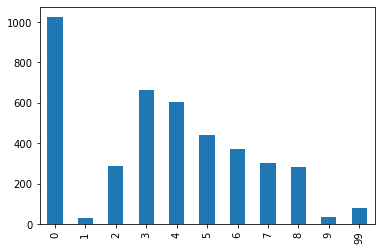

In [27]:
data_age = data['age'].apply(lambda age: age_to_int(age))
data_age.value_counts().sort_index().plot(kind='bar')

In [28]:
job_mapping = {'admin.': 0, 'blue-collar': 1, 'technician': 2, 'services': 3, '-': 99, 'management': 0, '.': 99,
               '?': 99, 'retired': 11, 'entrepreneur': 0, 'self-employed': 10, 'unemployed': 11, 'housemaid': 10,
               'student': 11}
data_job, job_ohe = one_hot_encoder_column(data, 'job', job_mapping, fill_na=99)

<AxesSubplot:>

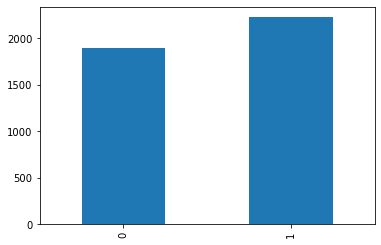

In [29]:
marital_mapping = {'married': 0, 'single': 1, 'divorced': 1, '-': 1, '.': 1, '?': 1}
data_marital = data['marital'].apply(lambda marital: 0 if marital == 'married' else 1)

data_marital.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

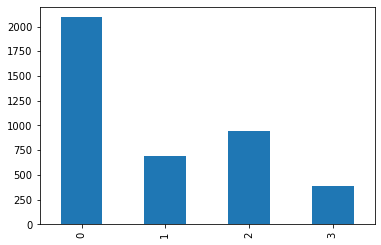

In [30]:
education_mapping = {'university.degree': 2, 'high.school': 1, 'basic.9y': 0, 'professional.course': 3, 'basic.4y': 0, '-': 0, '.': 0, 'basic.6y': 0, '?': 0, 'illiterate': 0, 0: 0}
data['education'] = data['education'].fillna(0)
data_education = data['education'].apply(lambda edu: education_mapping[edu])
data_education.value_counts().sort_index().plot(kind='bar')


In [31]:
housing_mapping = {'yes': 0, 'no': 1, '-': 0, '.': 0, '?': 0, 0:0}
data_housing, housing_ohe = one_hot_encoder_column(data, 'housing', housing_mapping, fill_na=99)
data_housing = pd.DataFrame(data_housing)

In [32]:
contact_mapping = {'cellular': 0, 'telephone': 1, '-': 2, '.': 2, '?': 2}
data_contact, contact_ohe = one_hot_encoder_column(data, 'contact', contact_mapping, fill_na=99)
data_contact = pd.DataFrame(data_contact)

In [33]:
day_of_week_mapping = {'thu': 0, 'mon': 1, 'tue': 2, 'wed': 3, 'fri': 4, '-': 5, '.': 5, '?': 5}
data_day_of_week, day_of_week_mapping_ohe = one_hot_encoder_column(data, 'day_of_week', day_of_week_mapping, fill_na=99)
data_day_of_week = pd.DataFrame(data_day_of_week)

In [34]:
data_duration = data['duration'].fillna(0)
data_duration[data_duration == '-'] = '0'
data_duration[data_duration == '.'] = '0'
data_duration[data_duration == '?'] = '0'
data_duration = data_duration.astype(int)

In [35]:
data['campaign'].value_counts()
data_campaign = data['campaign'].fillna(0)
data_campaign[data_campaign == '-'] = '0'
data_campaign[data_campaign == '.'] = '0'
data_campaign[data_campaign == '?'] = '0'
data_campaign = data_campaign.astype(int)

In [36]:
data['pdays'].value_counts()
non_values = ['-', '.', '?']
data_pdays = data['pdays'].fillna(999)
data_pdays[data_pdays.isin(non_values)] = 999
data_pdays = data_pdays.astype(int)
data_pdays.value_counts()

999    3996
3        38
6        30
4        13
7         8
10        6
5         4
12        4
1         3
2         3
18        2
0         2
13        2
9         2
14        1
21        1
11        1
15        1
19        1
16        1
Name: pdays, dtype: int64

In [37]:
data_previous = fill_na(data['previous'], non_list=non_values, na_value=0)
data_previous.value_counts()

0    3679
1     355
2      50
3      20
4      12
6       2
5       1
Name: previous, dtype: int64

In [38]:
poutcome_mapping = {'nonexistent': 0, 'failure': 1, '-': 0, '.': 0, '?': 0, 'success': 2}
data_poutcome, poutcome_ohe = one_hot_encoder_column(data, 'poutcome', poutcome_mapping, fill_na=0)
data_poutcome = pd.DataFrame(data_poutcome)

data_poutcome

,poutcome_0,poutcome_1
id,,
50000,0.0,0.0
50001,0.0,0.0
50002,0.0,0.0
50003,0.0,0.0
50004,0.0,0.0
...,...,...
54114,0.0,0.0
54115,0.0,0.0
54116,1.0,0.0


In [39]:
from sklearn.preprocessing import StandardScaler
data_emp_var_rate = data['emp.var.rate']
data_cons_price_idx = data['cons.price.idx']
data_cons_conf_idx = data['cons.conf.idx']
data_euribor3m = data['euribor3m']
data_nr_employed = data['nr.employed']

In [40]:
data_y = data['y'].apply(lambda y: 1 if y=='yes' else 0)

In [41]:
data_all = pd.concat([data_age, data_job, data_marital, data_education, data_housing, data_contact, data_day_of_week,
                      data_duration, data_campaign, data_pdays, data_previous, data_poutcome, data_y], axis=1)

data_all.to_csv("./data/feature_2_test.csv")

